In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C://Users//Aniket//Desktop//all//ml lecture//project//telecom_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID",axis=1,inplace=True)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
for col in df:
    print(col)
    x=df[(col)].value_counts()
    print(x)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection


In [9]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes('object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [12]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [13]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [16]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [17]:
df_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,-0.001874,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.037653,0.150889
tenure,0.016567,1.000000,0.247900,0.005106,0.379697,0.159712,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.158523,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,-0.014569,0.096848,-0.113890,0.247398,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,-0.074195,0.352150,-0.193407,0.279875,0.193356
gender,-0.001874,0.005106,-0.014569,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.005291,-0.008612
Partner,0.016479,0.379697,0.096848,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.059568,-0.150448
Dependents,-0.211185,0.159712,-0.113890,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.009572,-0.164221
PhoneService,0.008576,0.008448,0.247398,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.083195,0.011942
MultipleLines,0.146185,0.343032,0.433576,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.114955,0.038037
InternetService,-0.032310,-0.030359,-0.323260,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.055724,-0.047291
OnlineSecurity,-0.128221,0.325468,-0.053878,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,0.042357,-0.289309


SeniorCitizen
1.8332421986079817


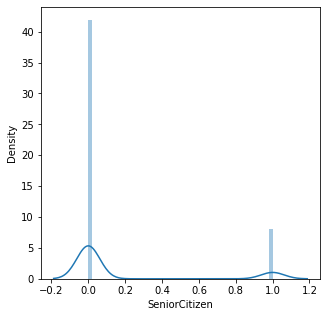

tenure
0.2394887299846216


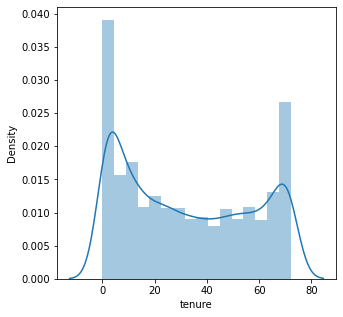

MonthlyCharges
-0.2204774644391769


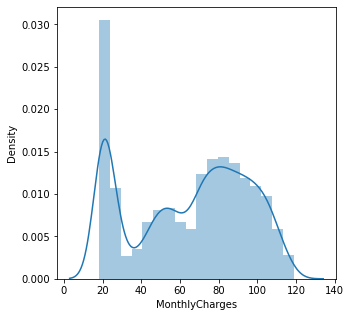

gender
-0.019026844201506316


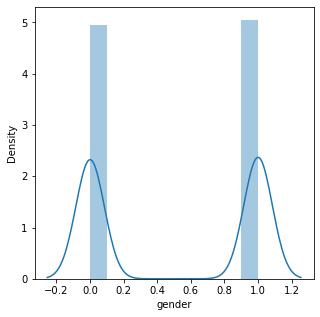

Partner
0.06790791663616631


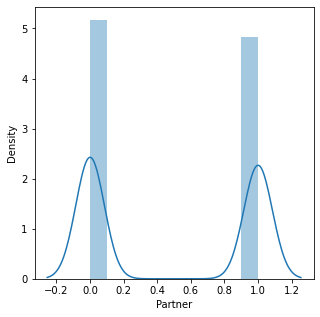

Dependents
0.8750121687324416


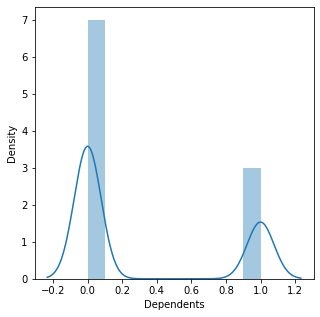

PhoneService
-2.726572082066742


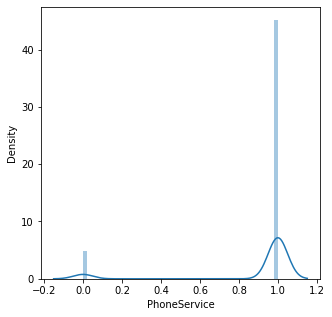

MultipleLines
0.11869417122754078


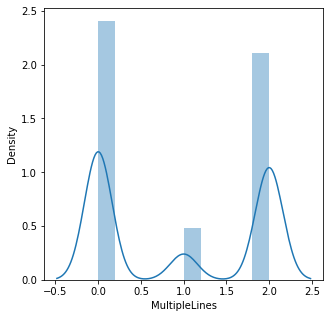

InternetService
0.2053797021050899


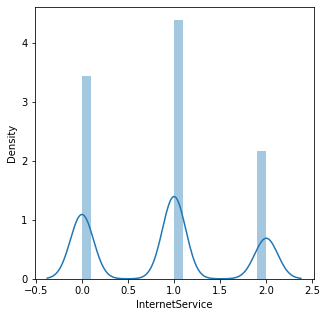

OnlineSecurity
0.41689625409816844


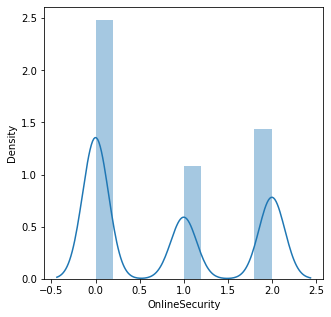

OnlineBackup
0.18289142401475716


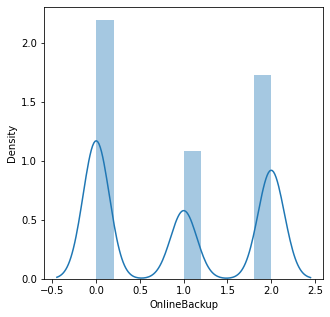

DeviceProtection
0.1868074171892961


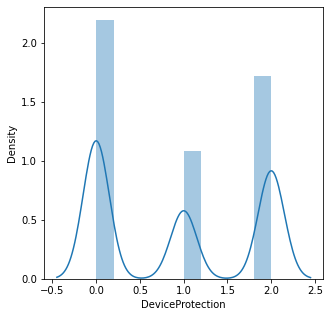

TechSupport
0.40227880430729396


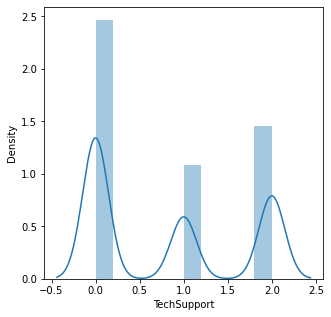

StreamingTV
0.028479564059039238


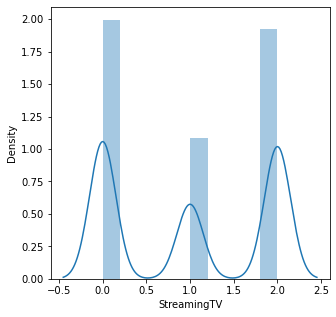

StreamingMovies
0.014653534183632504


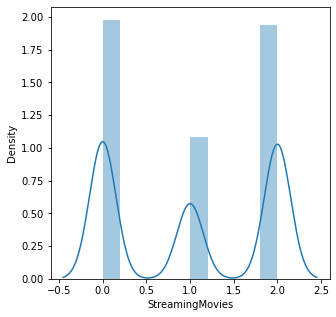

Contract
0.6308247103807392


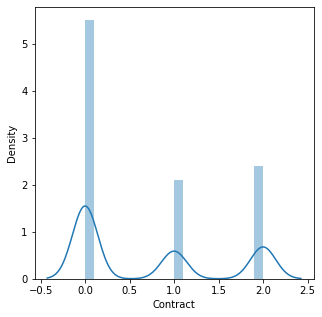

PaperlessBilling
-0.37531579195390014


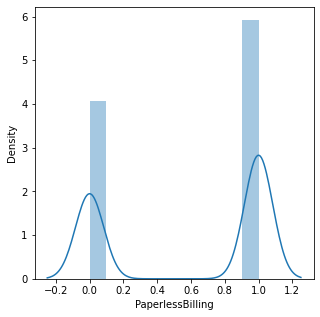

PaymentMethod
-0.17009317978593452


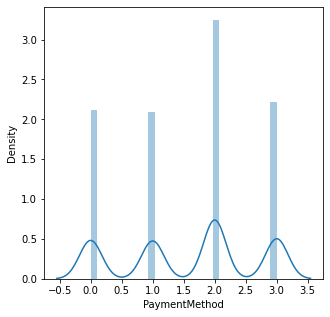

TotalCharges
0.015853722811758487


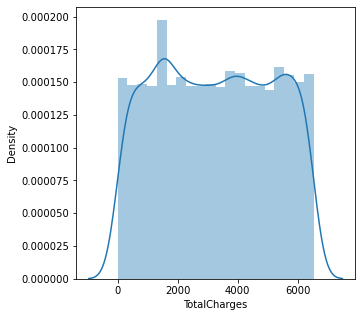

Churn
1.062805029480675


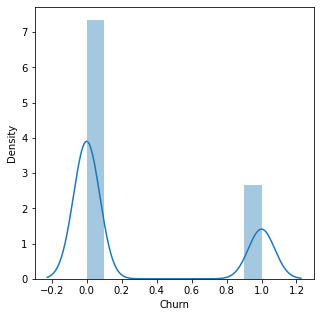

In [18]:
from scipy.stats import skew
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    plt.figure(figsize=(5,5))
    sns.distplot(df_new[col])
    plt.show()

In [25]:
X=df_new.drop("Churn",axis=1)
Y=df_new["Churn"] 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [31]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.56      0.59       528

    accuracy                           0.81      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [36]:
from sklearn.metrics import confusion_matrix

In [38]:
TP,FP,FN,TN=confusion_matrix(Y_test,y_pred).ravel()
print("TP : ",TP)
print("FP : ",FP)
print("FN : ",FN)
print("TN : ",TN)

TP :  1412
FP :  173
FN :  234
TN :  294


In [43]:
def create_model(model):
    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_test) 
    print(classification_report(Y_test,y_pred))
    return model

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt1=DecisionTreeClassifier()

In [46]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1585
           1       0.47      0.55      0.51       528

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.73      0.74      2113



In [47]:
from sklearn import tree

In [48]:
features=X.columns

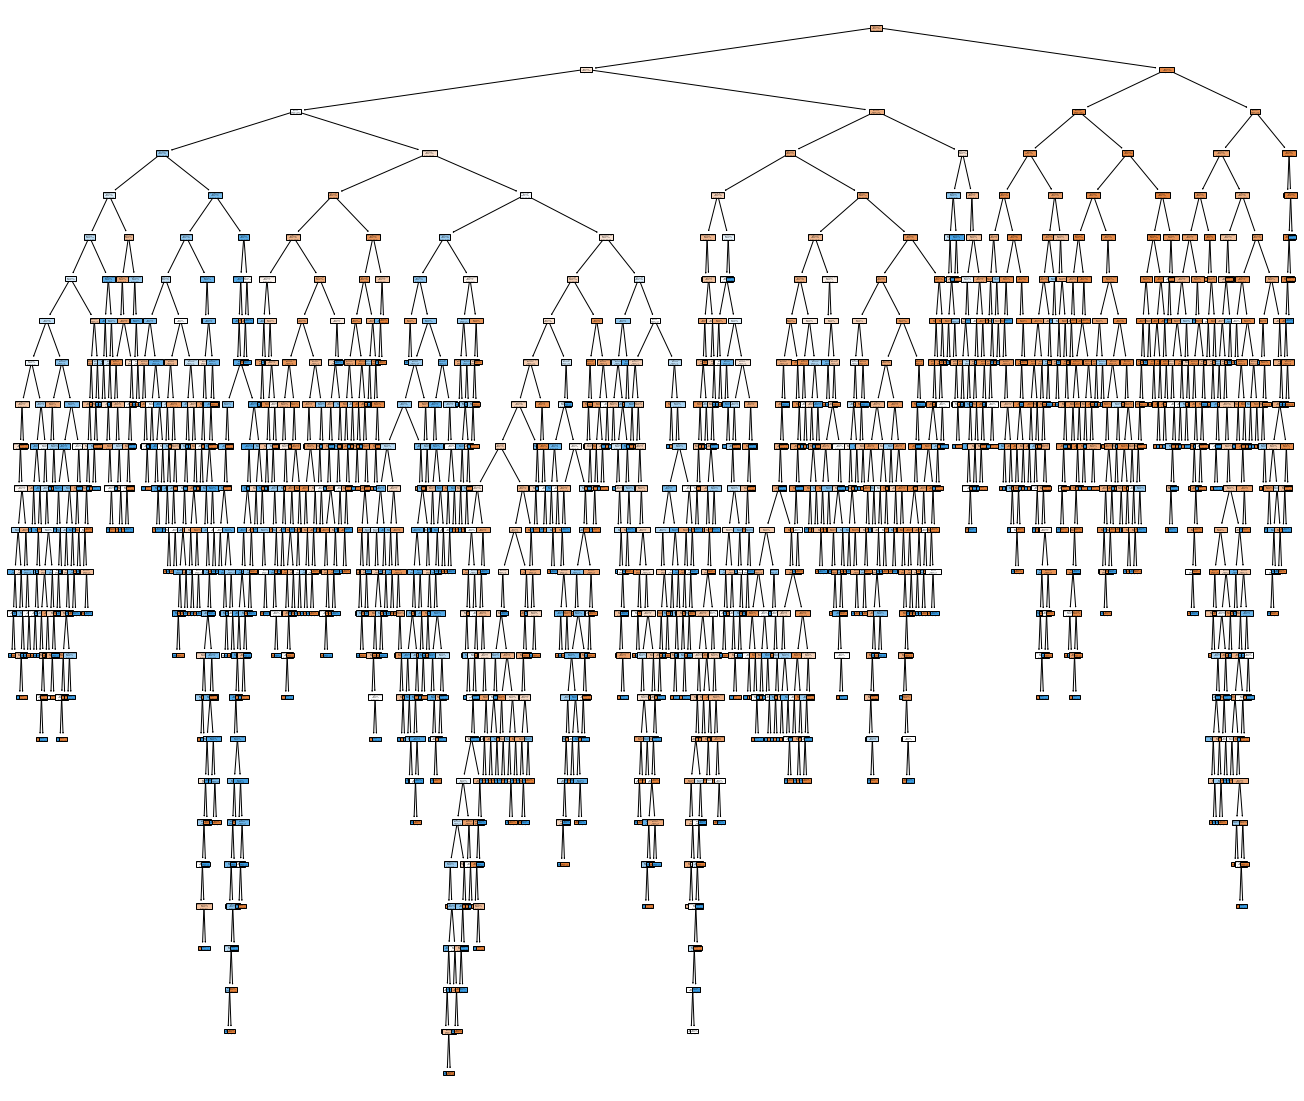

In [49]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [71]:
dt3=DecisionTreeClassifier(min_samples_leaf=50)

In [72]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [62]:
dt4=DecisionTreeClassifier(min_samples_leaf=50,criterion='entropy')

In [63]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.61      0.56      0.59       528

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



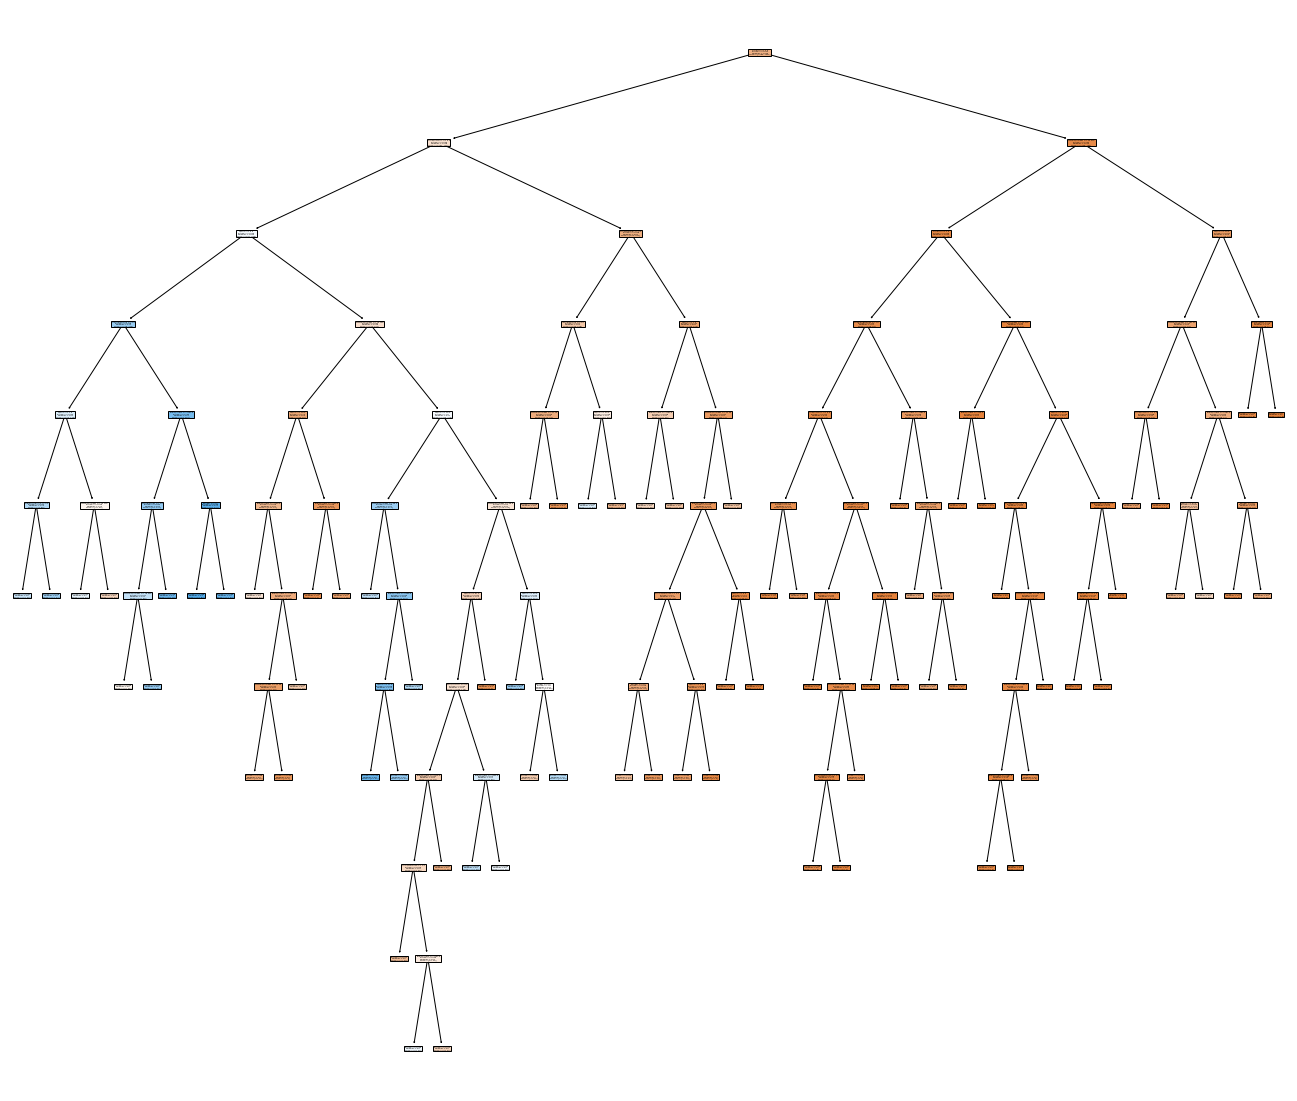

In [64]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt4,feature_names=features,filled=True)

In [ ]:
#in this dataset: best puring techniques : min_samples_leaf=50
#criterion= gini by default

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [84]:
create_model(rfc)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1585
           1       0.61      0.49      0.55       528

    accuracy                           0.80      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113



RandomForestClassifier(max_features=10, n_estimators=10, random_state=1)

In [ ]:
#for this data set best max_feature = 10

In [86]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Aniket\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [88]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [89]:
ros = RandomOverSampler()

NameError: name 'RandomOverSampler' is not defined

In [ ]:
X_sample1,y_sample1 = ros.fit_sample(X_train,y_train) 

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
lr1=LogisticRegression()

In [ ]:
lr1.fit(X_sample1,y_sample1)

In [ ]:
y_pred=lr1.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
def create_modelN(model):
    model.fit(X_sample1,y_sample1)
    y_pred=model.predict(X_test) 
    print(classification_report(Y_test,y_pred))
    return model

In [ ]:
dt9=DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
dt9=create_modelN(dt9)

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [ ]:
create_modelN(rfc)

In [ ]:
rus=RandomUnderSampler()

In [ ]:
X_sample2,y_sample2=rus.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
pd.Series(y_sample2).value_counts()

In [ ]:
lr2=LogisticRegression()

In [ ]:
lr2.fit(X_sample2,y_sample2)

In [ ]:
y_pred1=lr2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred1))

In [ ]:
def create_modelP(model):
    model.fit(X_sample2,y_sample2) 
    y_pred=model.predict(X_test) 
    print(classification_report(Y_test,y_pred))
    return model

In [ ]:
dt8=DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
dt9=create_modelP(dt9)

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [ ]:
create_modelP(rfc)